In [ ]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['batch_size']= str(2048)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MSE'
environ['layers'] = '300 200 120 80 30'
environ['dropouts'] = '0.4 0.4 0.3 0.3 0.3'
environ['log'] = 'False'
environ['weight_decay'] = '0.01'
environ['cuda_device'] ='cuda:0'
environ['dataset'] = 'data/speedup_dataset2.pkl'

%run utils.ipynb

In [ ]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}_log_{log}")

In [45]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


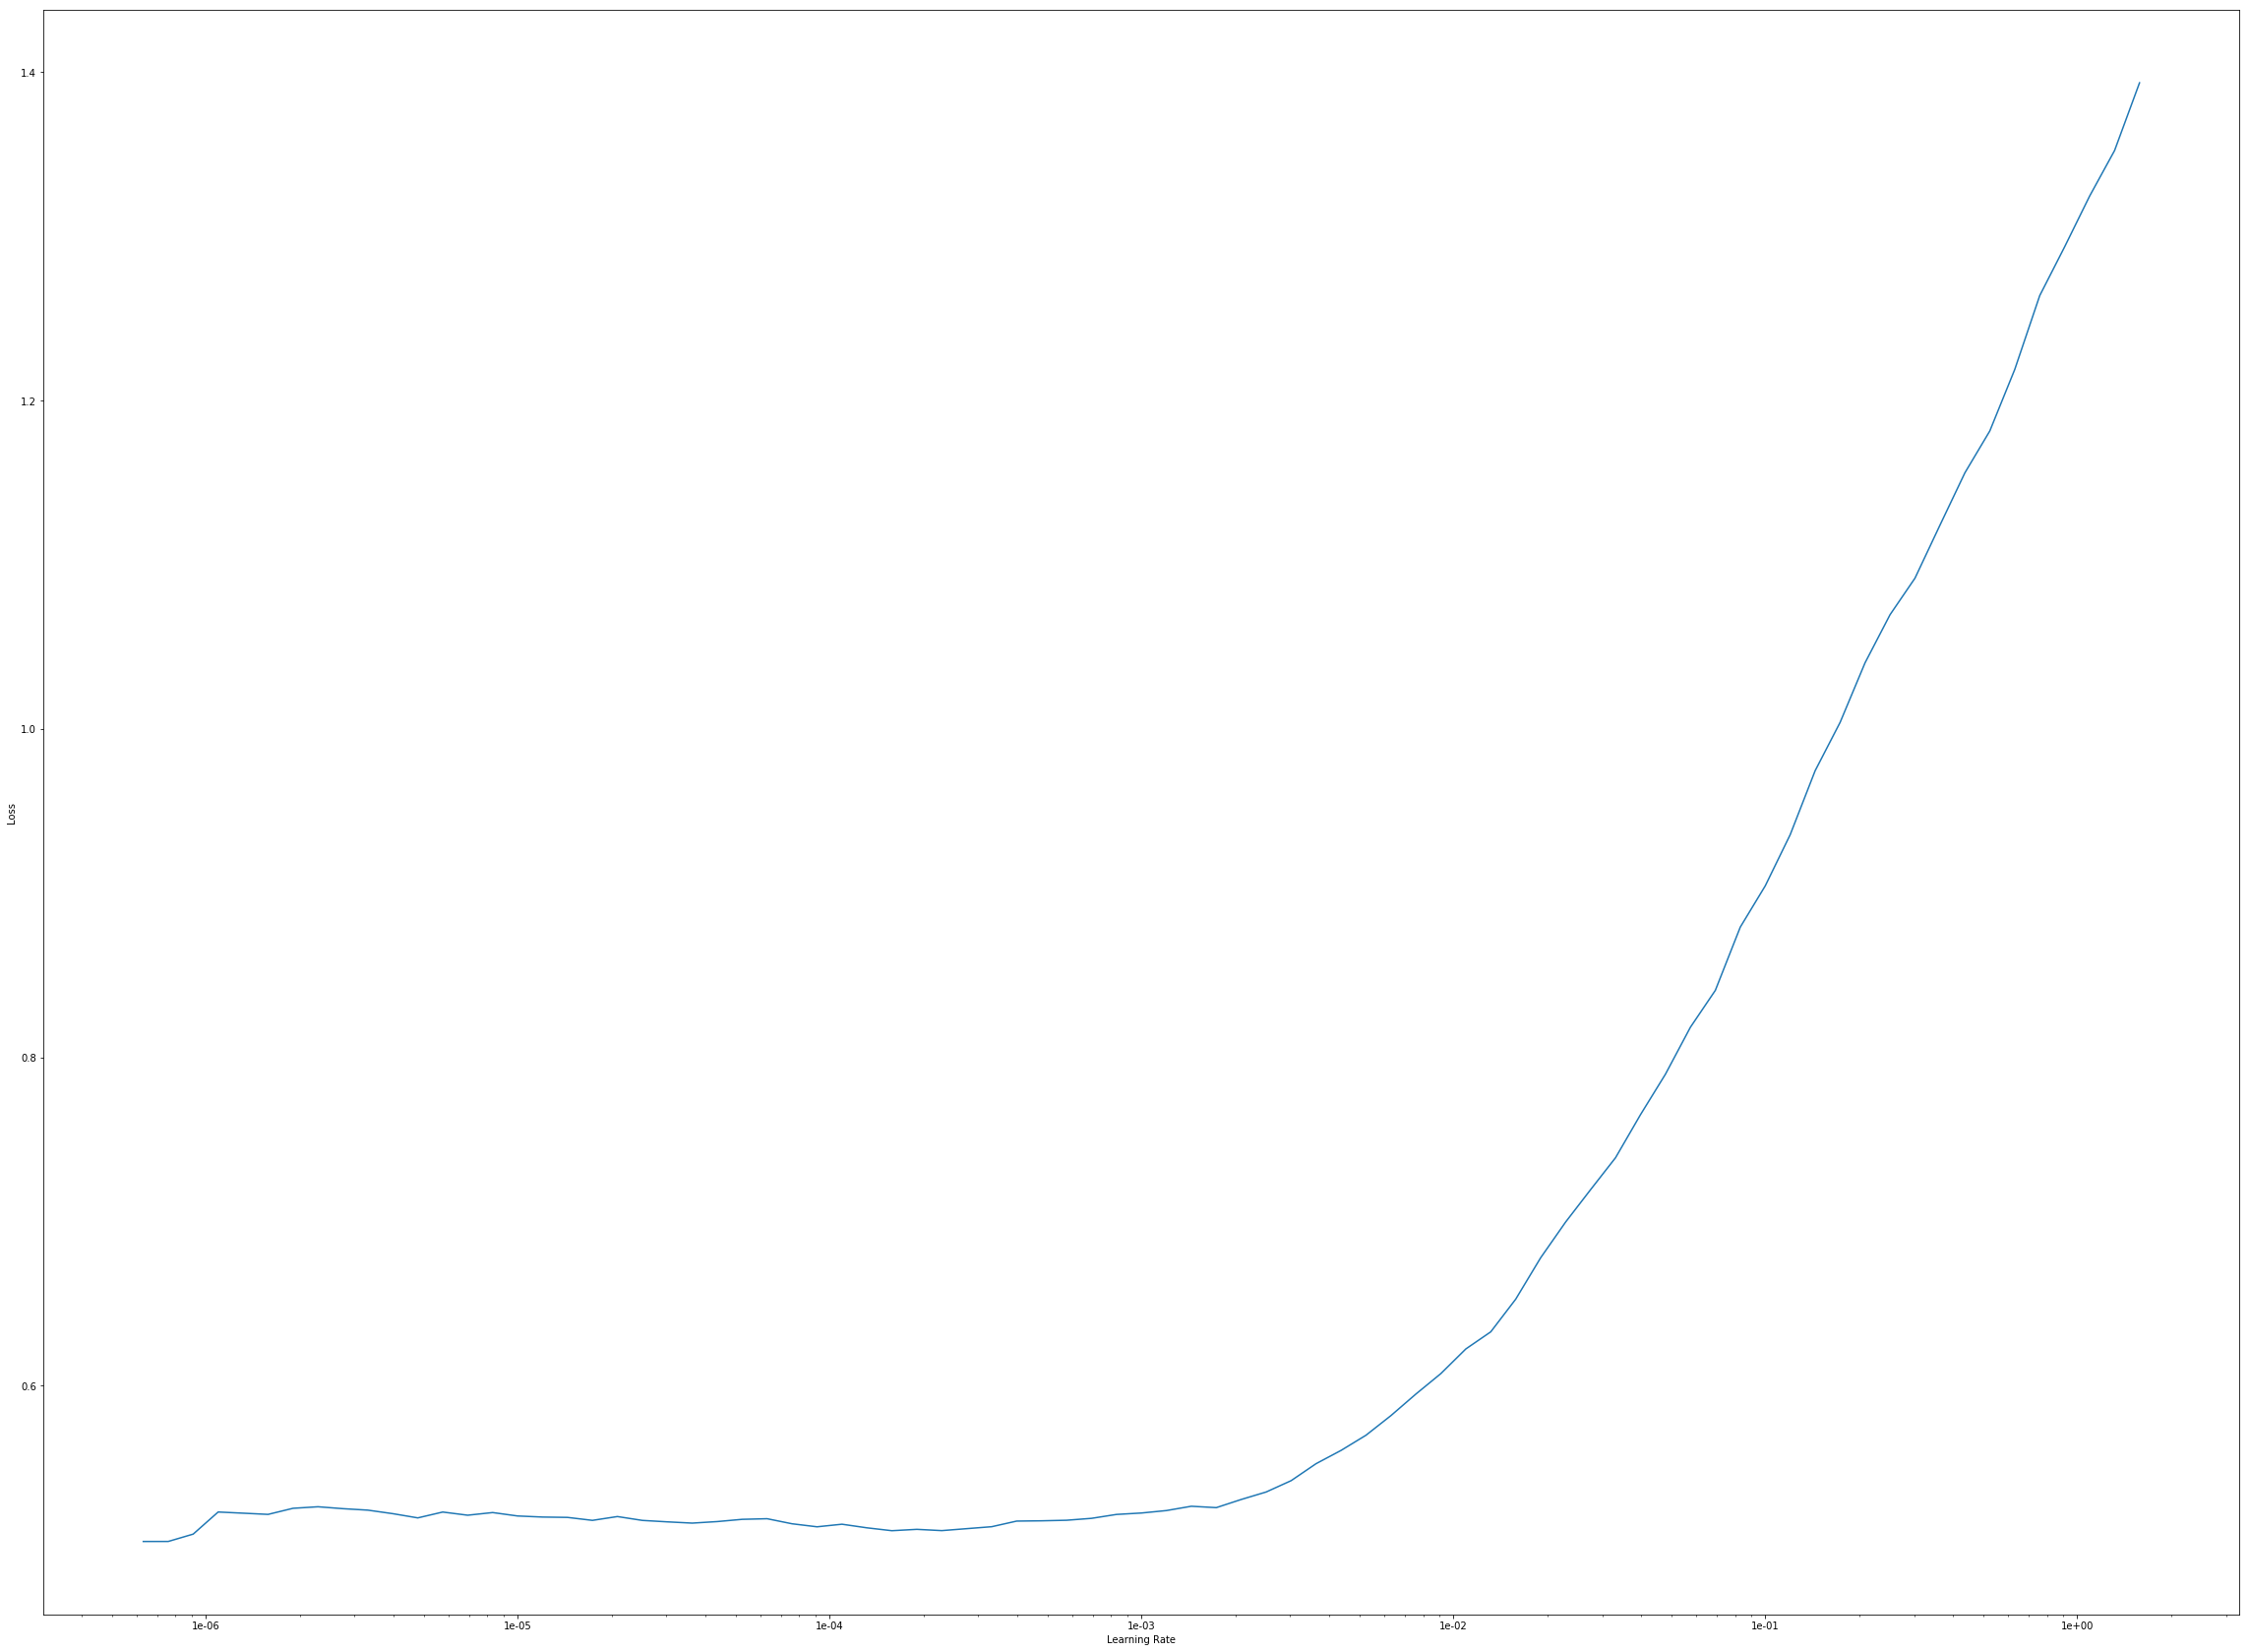

In [46]:
l.recorder.plot()

In [54]:
lr = 1e-05

In [ ]:
l.model.train()
l.fit(1000, lr)

epoch,train_loss,valid_loss,mape_criterion,rmse_criterion
1,0.502589,0.742361,100.000572,0.861518
2,0.502289,0.731261,99.134804,0.854971
3,0.499858,0.744847,101.063263,0.862743
4,0.503978,0.751893,99.716873,0.866517
5,0.498829,0.731929,102.438988,0.855361
6,0.500724,0.757829,101.906776,0.870409
7,0.497976,0.729692,99.998909,0.854059
8,0.492614,0.749749,100.373764,0.865652
9,0.493766,0.770338,101.733925,0.877348
10,0.497227,0.732609,100.401825,0.855790


In [ ]:
l.recorder.plot_losses()

In [ ]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}")

In [37]:
val_df = get_results_df(val_dl, l.model)
train_df = get_results_df(train_dl, l.model)

In [42]:
df = val_df

In [43]:
df[:][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.760405,1.601825,0.561370,102.005058
std,1.665163,1.653595,0.637904,207.246323
min,0.159264,0.010685,0.000033,0.003720
25%,0.545770,0.301894,0.138666,15.540740
50%,1.079639,0.970127,0.316696,34.417971
75%,2.489087,2.176448,0.763937,84.243074
max,7.238732,7.522550,5.733644,1831.059448


In [159]:
df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)][['prediction','target', 'abs_diff','APE']].describe()

,prediction,target,abs_diff,APE
count,5272.000000,5272.000000,5272.000000,5272.000000
mean,5.139454,5.371452,0.573196,24.085110
std,2.129367,2.290008,0.491706,81.973442
min,0.541461,0.058317,0.000058,0.001177
25%,4.618636,3.869889,0.205381,4.140809
50%,5.469416,5.639095,0.451528,8.874032
75%,6.063024,6.547940,0.809658,15.718910
max,10.828941,13.560771,3.484350,828.611633


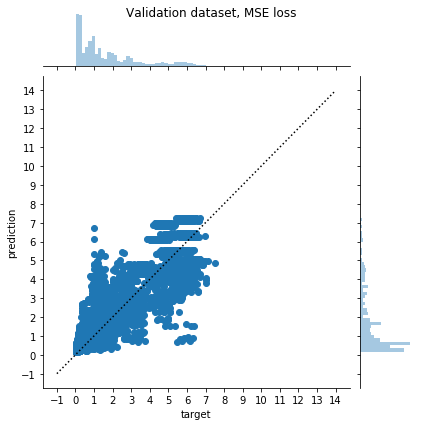

In [44]:
df1 = df[(df.interchange == 0) & (df.tile == 0) & (df.unroll == 1)]
#joint_plot(df1, f"Validation dataset, {loss_func} loss")
df2 = df
joint_plot(df2, f"Validation dataset, {loss_func} loss")